In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [32]:
df = pd.read_csv('/Volumes/external/Sangeetha-Project/book_reviews.csv',
                 names=['reviewerId', 'asin', 'review', 'rating',
                        'summary', 'unixtime', 'pos_votes', 'total_votes']) \
    .drop(columns=['review','unixtime'])\
    .astype({'rating': 'int8', 'pos_votes':'uint16', 'total_votes':'uint16'})

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728360 entries, 0 to 2728359
Data columns (total 6 columns):
reviewerId     object
asin           object
rating         int8
summary        object
pos_votes      uint16
total_votes    uint16
dtypes: int8(1), object(3), uint16(2)
memory usage: 75.5+ MB


In [12]:
df.pos_votes.max()

23311

In [13]:
df.total_votes.max()

24212

In [14]:
print('Reviewers under 5: ', (df.reviewerId.value_counts() < 5).mean())
print('Mean reviewers: ', df.reviewerId.value_counts().mean())
print('Median reviewers: ', df.reviewerId.value_counts().median())
print('-----------------------------------------------')
print('Books under 5: ', (df.asin.value_counts() < 5).mean())
print('Mean books: ', df.asin.value_counts().mean())
print('Median books: ', df.asin.value_counts().median())

Reviewers under 5:  0.4638991705352155
Mean reviewers:  8.913267189587751
Median reviewers:  5.0
-----------------------------------------------
Books under 5:  0.06267074281254065
Mean books:  29.577641906248644
Median books:  11.0


In [15]:
df.describe(include='all')

,reviewerId,asin,rating,pos_votes,total_votes
count,2728360,2728360,2.728360e+06,2.728360e+06,2.728360e+06
unique,306101,92244,NaN,NaN,NaN
top,AFVQZQ8PW0L,030758836X,NaN,NaN,NaN
freq,14069,6612,NaN,NaN,NaN
mean,NaN,NaN,4.153319e+00,3.821344e+00,5.203446e+00
std,NaN,NaN,1.104071e+00,2.808396e+01,3.136853e+01
min,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,4.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,5.000000e+00,1.000000e+00,1.000000e+00
75%,NaN,NaN,5.000000e+00,2.000000e+00,4.000000e+00


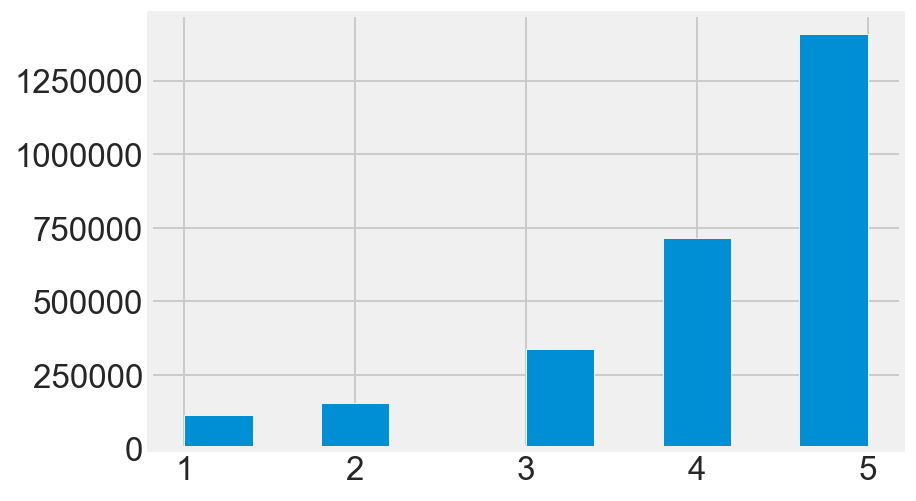

In [16]:
df.rating.hist()
plt.show()

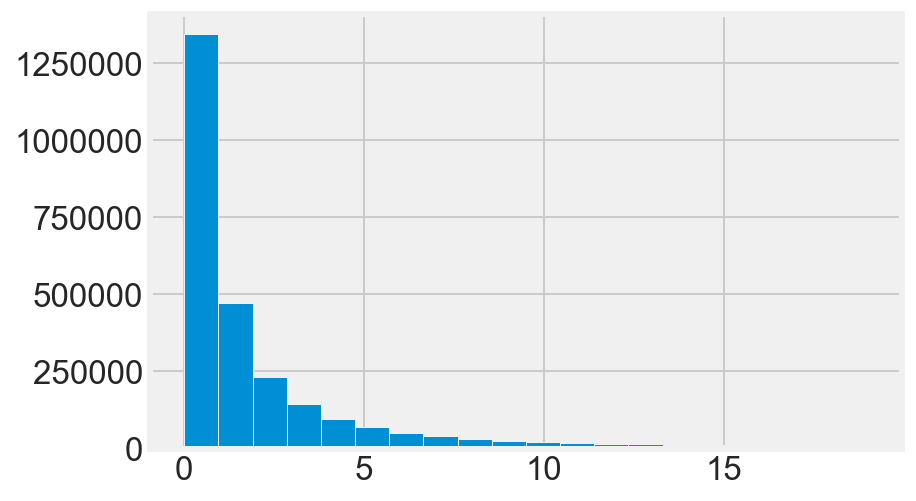

In [27]:
df[df.pos_votes < 20]['pos_votes'].hist(bins = 20)
plt.show()

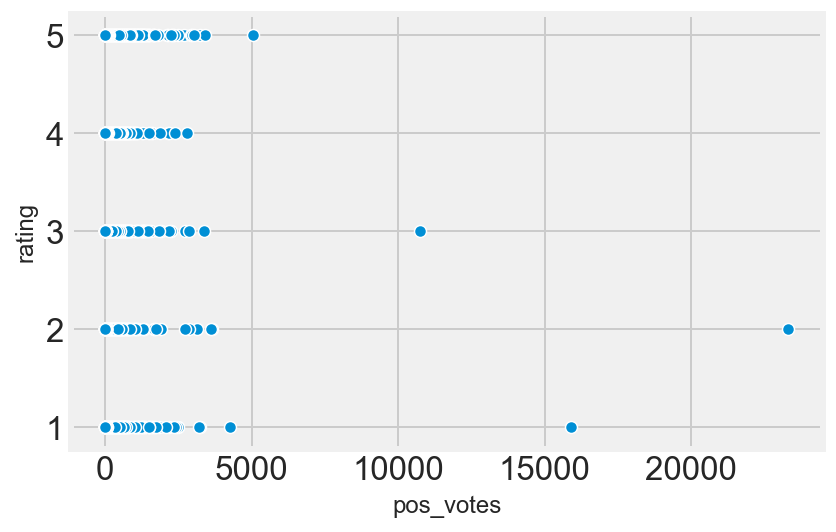

In [22]:
sns.scatterplot(df.pos_votes, df.rating)
plt.show()

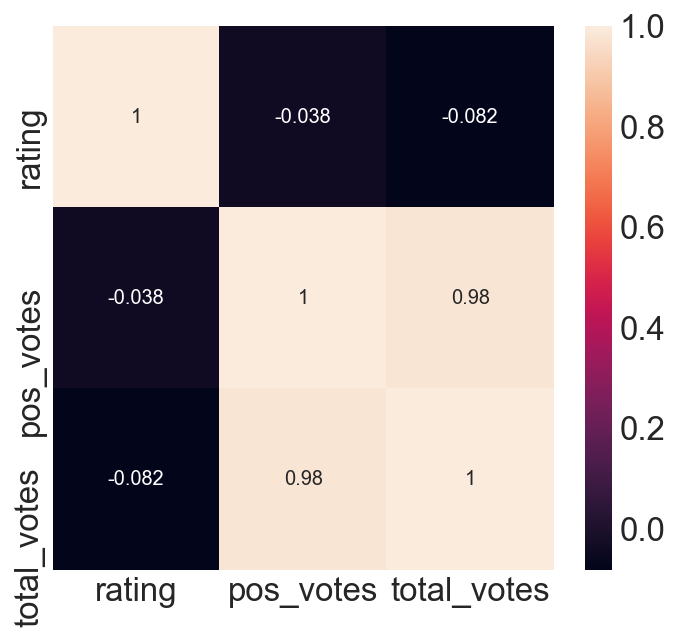

In [28]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

Do negative reviews tend to get more attention? 

In [29]:
df.groupby('rating')['pos_votes'].mean()

rating
1    10.215595
2     5.951972
3     3.941551
4     2.692039
5     3.613953
Name: pos_votes, dtype: float64

In [30]:
df.groupby('rating')['total_votes'].mean()

rating
1    20.141023
2     9.434577
3     5.556314
4     3.369746
5     4.374876
Name: total_votes, dtype: float64

In [34]:
df[df.pos_votes > 5000]

,reviewerId,asin,rating,summary,pos_votes,total_votes
974753,A1AFXJ8U72MD6L,0307913090,5,"Well plotted and paced; excellent, fresh fanta...",5057,5302
1546459,A3AL42LC3J38GH,345803485,3,An older man on truckling,10755,11479
1546549,A36P4L1N44HPJ4,345803485,1,Bestseller? Really???,15906,16596
1547253,A3JT5XR92IFRVL,345803485,2,Did a teenager write this???,23311,24212


### Maybe you can try to merge with the genres and do some eda with that 
### Maybe you can do some feature engineering with helpful range or scoring with examples from the RTC article
